### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

# feature engine
from feature_engine.encoding import MeanEncoder, WoEEncoder

In [2]:
from sklearn import set_config
set_config(display='diagram')

### Load dataset

In [3]:
# load titanic dataset

usecols = ["pclass", "sibsp", "parch", "sex", "embarked", "cabin", "survived"]

data = pd.read_csv("../../titanic.csv", usecols=usecols)
data["cabin"] = data["cabin"].str[0]

data.head()

,pclass,survived,sex,sibsp,parch,cabin,embarked
0,1,1,female,0,0,B,S
1,1,1,male,1,2,C,S
2,1,0,female,1,2,C,S
3,1,0,male,1,2,C,S
4,1,0,female,1,2,C,S


In [4]:
# let's remove observations with na in embarked

data.dropna(subset=["embarked"], inplace=True)
data.shape

(1307, 7)

In [5]:
data = data[data["cabin"] != "T"]
data.shape

(1306, 7)

### Train-Test Split

In [6]:
target  = 'survived'
X = data.drop(labels=[target], axis=1)
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=0
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (914, 6)
X_test shape: (392, 6)
y_train shape: (914,)
y_test shape: (392,)


### Preprocessing

# Basic

## One Hot Encoding (sklearn)

In [7]:
X_train.fillna('Missing', inplace=True)
X_test.fillna("Missing", inplace=True)

In [8]:
X_train['cabin'].replace(to_replace='nan', value='Missing', inplace=True)
X_test['cabin'].replace(to_replace='nan', value='Missing', inplace=True)

In [9]:
# # set up the categorical encoder

# encoder = OneHotEncoder(
#     categories='auto',
#     drop='first', # to return (k-1), use drop=False to return (k) dummies
#     sparse_output=False,
#     handle_unknown='error' # helps deal with rare labels
# )

In [10]:
# ct = ColumnTransformer(
#     [
#         ('encoder', encoder, ['sex', 'embarked', 'cabin'])
#     ],
#     remainder='passthrough'
# )

# ct.set_output(transform='pandas')

In [11]:
# ct.fit(X_train)

In [12]:
# X_train_enc = ct.transform(X_train)
# X_test_enc = ct.transform(X_test)

# X_train_enc.head()

# Monotonic

In [13]:
# let's have a look at how many labels each variable has

for col in data.columns:
    print(col, ": ", len(data[col].unique()), " labels")

pclass :  3  labels
survived :  2  labels
sex :  2  labels
sibsp :  7  labels
parch :  8  labels
cabin :  8  labels
embarked :  3  labels


In [14]:
# let's explore the unique categories

data["cabin"].unique()

array(['B', 'C', 'E', 'D', 'A', nan, 'F', 'G'], dtype=object)

In [15]:
data["sex"].unique()

array(['female', 'male'], dtype=object)

In [16]:
data["embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

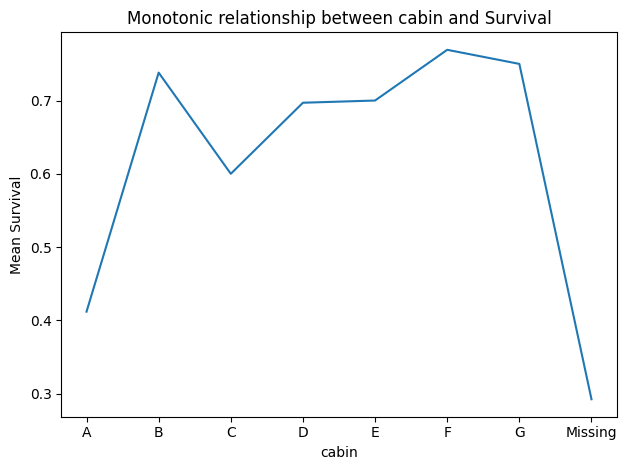

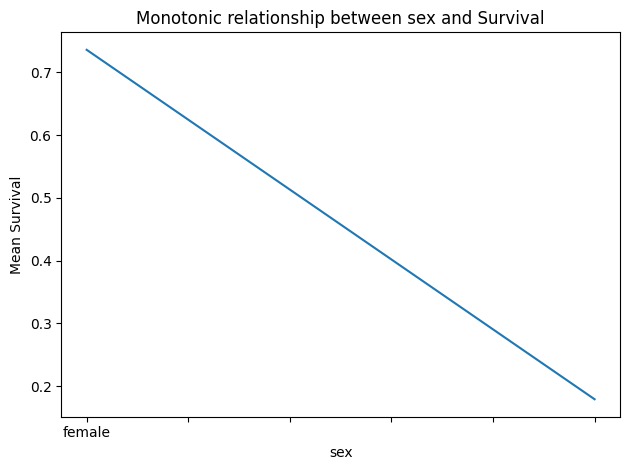

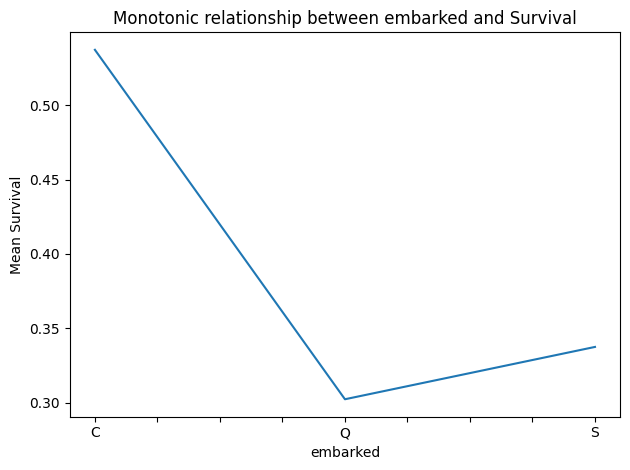

In [17]:
# let's inspect the newly created monotonic relationship
# between the variables and the target

for var in ["cabin", "sex", "embarked"]:

    fig, axes = plt.subplots()
    axes = y_train.groupby(X_train[var]).mean().plot()
    axes.set_title("Monotonic relationship between {} and Survival".format(var))
    axes.set_ylabel("Mean Survival")
    plt.tight_layout()
    plt.show()
    print()    

## Mean Encoding (Feature Engine)

In [18]:
# mean_enc = MeanEncoder(variables=["cabin", "sex", "embarked"])

In [19]:
# # When fitting the transformer, we need to pass the target as well 
# # just like with any scikit-learn predictor class

# mean_enc.fit(X_train, y_train)

In [20]:
# # in the encoder dict we see the target mean assigned to each
# # category for each of the selected variables

# mean_enc.encoder_dict_

In [21]:
# # this is the list of variables that the encoder will transform

# mean_enc.variables_

In [22]:
# X_train = mean_enc.transform(X_train)
# X_test = mean_enc.transform(X_test)

In [23]:
# # let's explore the result
# X_train.sample(5)

## Weight of Evidence (Feature Engine)

In [24]:
woe_enc= WoEEncoder(variables=["cabin", "sex", "embarked"])

In [25]:
# when fitting the transformer, we need to pass the target as well
# just like with any Scikit-learn predictor class

woe_enc.fit(X_train, y_train)

WoEEncoder(variables=['cabin', 'sex', 'embarked'])

In [26]:
# in the encoder dict we see the woe for each category
# for each of the selected variables

woe_enc.encoder_dict_

{'cabin': {'A': 0.1529838185513379,
  'B': 1.545750694176846,
  'C': 0.9151238705982346,
  'D': 1.3425678854251744,
  'E': 1.356956622877274,
  'F': 1.7136315668160063,
  'G': 1.60827105115818,
  'Missing': -0.37507116447186734},
 'sex': {'female': 1.535067647134885, 'male': -1.0131107672983564},
 'embarked': {'C': 0.658871160676746,
  'Q': -0.3265892617105483,
  'S': -0.16479628505772237}}

In [27]:
# this is the list of variables that the encoder will transform

woe_enc.variables_

['cabin', 'sex', 'embarked']

In [28]:
X_train = woe_enc.transform(X_train)
X_test = woe_enc.transform(X_test)

In [29]:
# let's explore the result
X_train.head()

,pclass,sex,sibsp,parch,cabin,embarked
843,3,-1.013111,1,0,-0.375071,-0.164796
869,3,-1.013111,0,0,-0.375071,-0.164796
430,2,1.535068,0,1,-0.375071,-0.164796
481,2,1.535068,1,2,-0.375071,0.658871
1308,3,-1.013111,0,0,-0.375071,-0.164796
